## Business Understanding
In this project we will be using the survey results to answer some questions that may be in the minds of professionals who are thinking about changing careers to some type of developer.

To achive the end results for this project, we will be employing CRISP-DM. The CRISP-DM Process (Cross Industry Process for Data Mining) is used to find manys solutions in the data science process. It includes the following 6 steps:

- Business Understanding
- Data Understanding: provide some stats about your data like mean and std deviations of the different features
- Data Preparation: show how you clean and prepare the data. It is important to document and not just write the code
- Results Evaluation: conclusion and discussion

As I am in the process of changing career paths, I pursued a career in data science. Changing to a different career can be overwhelming and many questions pop up. I wish I knew these when I first started. I will answer these questions related to breaking into the field:

- Overall, what programming languages were used the most in 2020 and how does it compare to 2019?
- What programming languages do data scientists use the most?
- What are the average hours worked per week?
- How often does someone in this field have to work overtime?
- How important is it to constantly learn new technology?

## Data Understanding
The data used in this analysis was Stack Overflow’s developer survey data from 2019 and 2020. There were 65,000 respondents in 2020 and 90,000 respondents in 2019, which is a 27% difference. This notebook attempted to use the survey results to answer the questions above.

Both United States and India had the most respondents to the survey in both 2019 and 2020. Both years also show about 90% of respondents are employed at least part-time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare Data

In [2]:
df_20 = pd.read_csv('./developer_survey_2020/survey_results_public.csv')
df_19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv')

schema_20 = pd.read_csv('./developer_survey_2020/survey_results_schema.csv')
schema_19 = pd.read_csv('./developer_survey_2019/survey_results_schema.csv')

year_lst = [2020, 2019]

**Following two cells are a preview of the data we are working with.**

In [3]:
schema_20

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [4]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df_20.shape

(64461, 61)

In [6]:
df_19.shape

(88883, 85)

In [7]:
df_20.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [8]:
df_19.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [9]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [10]:
print('Total null values is:', df_20.isnull().sum().sum())

Total null values is: 908664


In [11]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

**After taking a closer look at the data, to answer the questions I chose to use `Employment`, `WorkWeekHrs`, `NEWOvertime`, `MainBranch`, `DevType`, and `Country`**

In [12]:
df_19['Employment'].value_counts(normalize = True)

Employed full-time                                      0.739152
Independent contractor, freelancer, or self-employed    0.097624
Not employed, but looking for work                      0.064234
Employed part-time                                      0.051261
Not employed, and not looking for work                  0.043622
Retired                                                 0.004106
Name: Employment, dtype: float64

In [13]:
df_20['Employment'].value_counts(normalize = True)

Employed full-time                                      0.708961
Student                                                 0.121950
Independent contractor, freelancer, or self-employed    0.088828
Not employed, but looking for work                      0.036693
Employed part-time                                      0.034720
Not employed, and not looking for work                  0.005043
Retired                                                 0.003806
Name: Employment, dtype: float64

In [140]:
col20_interest = ['WelcomeChange', 'WorkWeekHrs', 'NEWOvertime']
print('Year 2020')

for i in col20_interest:
    print('Responded - {}:'.format(i), df_20[i].isnull().value_counts()[0] / df_20.shape[0] * 100, '%')

Year 2020
Responded - WelcomeChange: 81.72848699213478 %
Responded - WorkWeekHrs: 63.83860008377158 %
Responded - NEWOvertime: 67.06535734785373 %


In [143]:
col19_interest = col20_interest[:2]
print('Year 2019')

for t in col19_interest:
    print('Responded - {}:'.format(t), df_19[t].isnull().value_counts()[0] / df_19.shape[0] * 100, '%')

Year 2019
Responded - WelcomeChange: 96.59327430442268 %
Responded - WorkWeekHrs: 72.570682807736 %


In [19]:
df_19['MainBranch'].value_counts(normalize = True)

I am a developer by profession                                                   0.743555
I am a student who is learning to code                                           0.115350
I am not primarily a developer, but I write code sometimes as part of my work    0.085349
I code primarily as a hobby                                                      0.037812
I used to be a developer by profession, but no longer am                         0.017933
Name: MainBranch, dtype: float64

In [20]:
df_20['MainBranch'].value_counts(normalize = True)

I am a developer by profession                                                   0.735529
I am a student who is learning to code                                           0.124217
I am not primarily a developer, but I write code sometimes as part of my work    0.085752
I code primarily as a hobby                                                      0.036065
I used to be a developer by profession, but no longer am                         0.018438
Name: MainBranch, dtype: float64

In [137]:
def plot_devtype(devtype, year):
    '''
    Plot developer types based on count
    
    Args:
        devtype: List. Contains DataFrame with counts of developer types
        year: List. Format plot title
        
    Returns:
        None
    '''
    plt.figure()
    sns.barplot(data = devtype.head(10), y = devtype.head(10).index, x = 'DevType')
    plt.title('Developer Types in {}'.format(year))

In [132]:
devtype_19 = pd.DataFrame(df_19['DevType'].value_counts())
devtype_20 = pd.DataFrame(df_20['DevType'].value_counts())

devtype_lst = [devtype_20, devtype_19]

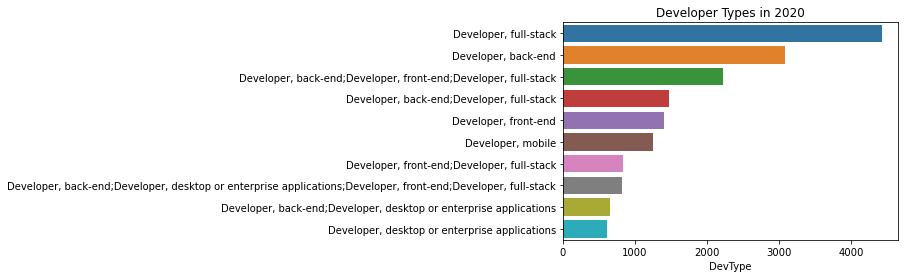

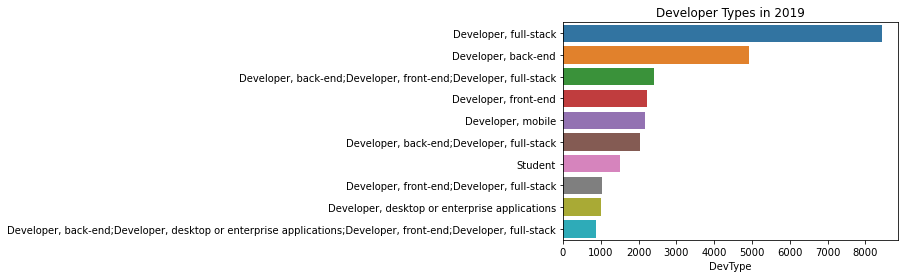

In [133]:
for i, y in zip(devtype_lst, year_lst):
    plot_devtype(i, y)

In [134]:
def plot_country(country, year):
    '''
    Plots count by country
    
    Args:
        country: List. Contains DataFrames with relevant data
        year: List. Format plot title
        
    Returns:
        None
    '''
    plt.figure()
    sns.countplot(data = country, y = 'Country', order = pd.value_counts(country['Country']).iloc[:10].index)
    plt.title('Respondent Count by Country {}'.format(year))

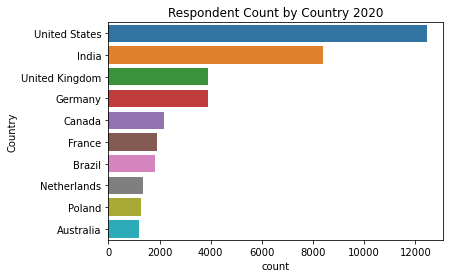

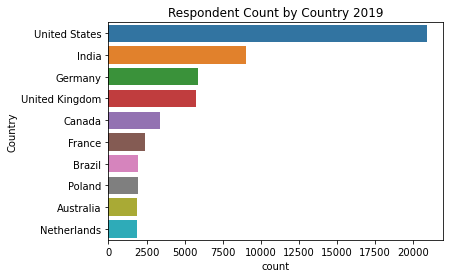

In [135]:
for i, y in zip([df_20, df_19], year):
    plot_country(i, y)

### 1. Programming languages in 2020? Any changes from 2019?

`LanguageWorkedWith` was used as it contains data on what programming languages were used.

In [73]:
# Remove missing values otherwise error will occur
# Values are missing possibly due to respondent not answering the question
languages_20 = df_20[df_20['LanguageWorkedWith'].notnull()]
languages_19 = df_19[df_19['LanguageWorkedWith'].notnull()]

In [90]:
def prep_data(df, gen_ds):
    '''
    This function takes the LanguageWorkedWith column and splits the responses into unique programming languages
    then finds the count for each language and stores it as a DataFrame
    
    Args:
        df: DataFrame containing survey public data
        gen_ds: String. Used for conditional statement
    
    Returns:
        lang_df: DataFrame containing programming language/Developer Type and count
    '''
    
    if gen_ds == 'gen':
        lang_unique = {}

        for lang_set in df['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
            for language in lang_set:
                if language not in lang_unique.keys():
                    lang_unique[language] = 1
                else:
                    lang_unique[language] += 1

        lang_df = pd.DataFrame.from_dict(lang_unique, orient = 'index')
        lang_df.columns = ['Count']
        lang_df = lang_df.sort_values(by = 'Count', ascending = False)
    
    if gen_ds == 'ds':
        lang_DS = {}

        for lang_set in df['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
            for language in lang_set:
                if language not in lang_DS.keys():
                    lang_DS[language] = 1
                else:
                    lang_DS[language] += 1

        lang_df = pd.DataFrame.from_dict(lang_DS, orient = 'index')
        lang_df.columns = ['Count']
        lang_df = lang_df.sort_values(by = 'Count', ascending = False)
        
    return lang_df

In [91]:
language_df20 = prep_data(languages_20, 'gen')
language_df19 = prep_data(languages_19, 'gen')

lang_lst = [language_df20, language_df19]

In [92]:
def plot_languages(df, year, gen_ds):
    '''
    Plots progamming languages by count
    
    Args:
        df: DataFrame containing programming languages and count
        year: List. Format plot title
        gen_ds: String. To use in if statement to select plot title
        
    Returns:
        None
    '''
    plt.figure(figsize = (12,6))
    
    if gen_ds == 'gen':
        plt.title('Most Used Programming Languages {}'.format(year))
    if gen_ds == 'ds':
        plt.title('Most Used Programming Languages by Data Scientists {}'.format(year))
        
    plt.xlabel('Count')
    plt.ylabel('Programming Language')
    sns.barplot(data = df, x = 'Count', y = df.index)

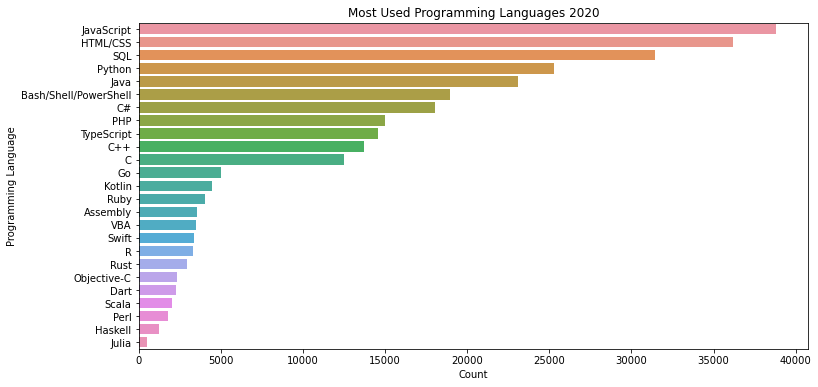

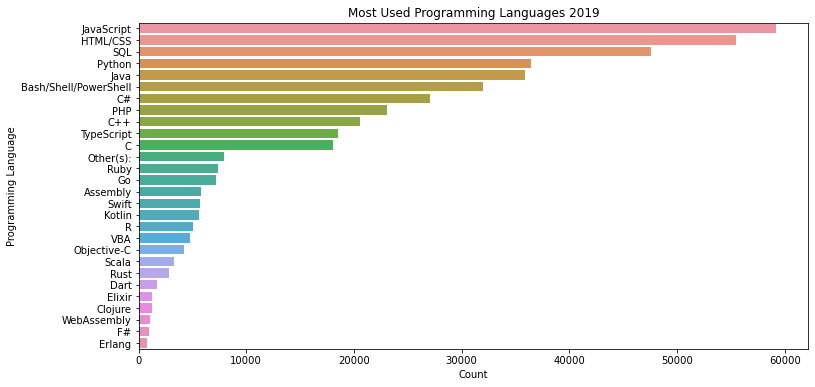

In [93]:
for idf, iyr in zip(lang_lst, year_lst):
    plot_languages(idf, iyr, 'gen')

### 2. Programming Language Comparison for Data Science and Machine Learning?

What programming languages should one learn if they are interested in becoming a data scientist or machine learning engineer?

Programming language data from question 1 was used to help answer question 2.

In [94]:
# Remove missing values otherwise error will occur
# Values are missing possibly due to respondent not answering the question
languages_DS_20 = languages_20[languages_20['DevType'].str.contains('Data scientist', na = False)]
languages_DS_19 = languages_19[languages_19['DevType'].str.contains('Data scientist', na = False)]

In [95]:
lang_DS20 = prep_data(languages_DS_20, 'ds')
lang_DS19 = prep_data(languages_DS_19, 'ds')

In [97]:
lang_DS_lst = [lang_DS20, lang_DS19]

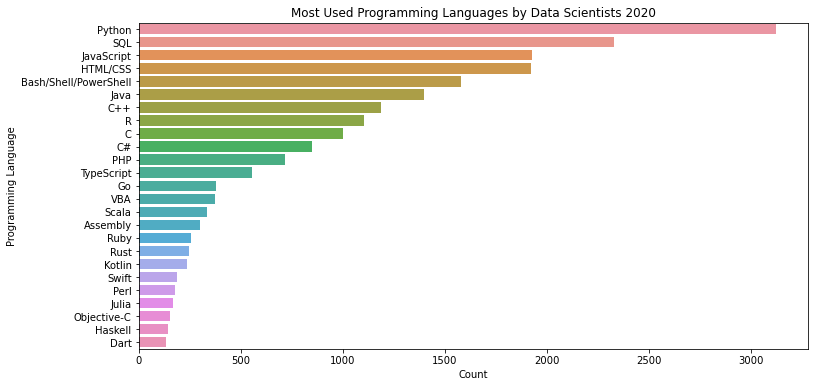

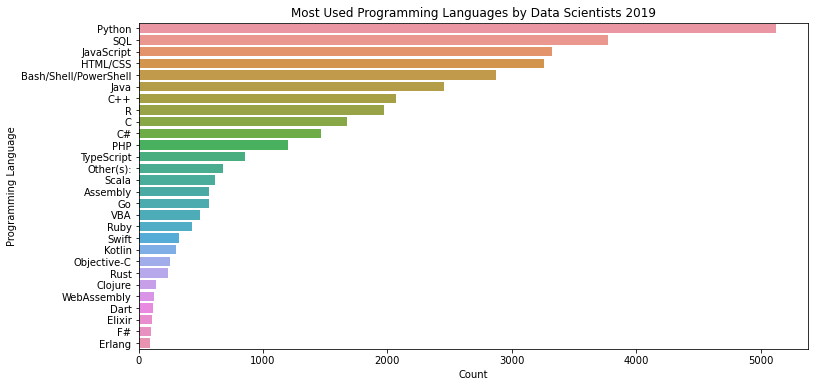

In [98]:
for i, p in zip(lang_DS_lst, year_lst):
    plot_languages(i, p, 'ds')

### 3. Hours Worked Per Week

Null values in `WorkWeekHrs` were dropped as a respondent may not have answered that question. Imputation will not affect the result of the answer.

In [116]:
workweek_20 = pd.DataFrame(df_20['WorkWeekHrs'].dropna().value_counts().sort_values(ascending = False).reset_index())
workweek_19 = pd.DataFrame(df_19['WorkWeekHrs'].dropna().value_counts().sort_values(ascending = False).reset_index())

workweek_lst = [workweek_20, workweek_19]

In [120]:
def plot_workweek(workweek, year):
    '''
    Plots Count of Hours Worked Per Week
    
    Args:
        workweek: DataFrame containing counts of hours worked per week
        year: List. Format title of plot
        
    Returns:
        None
    '''
    workweek.columns = ['HoursPerWeek', 'Count']
    
    plt.figure(figsize = (12,6))
    plt.title('{} Top 10 Hours Worked Per Week by # of Hours'.format(year))
    sns.barplot(data = workweek.head(10), x = 'HoursPerWeek', y = 'Count')

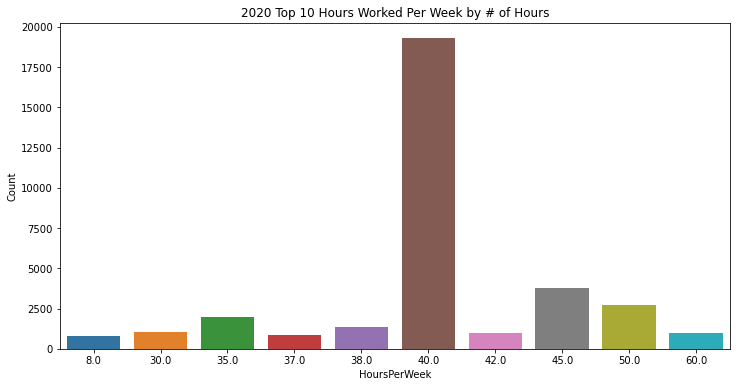

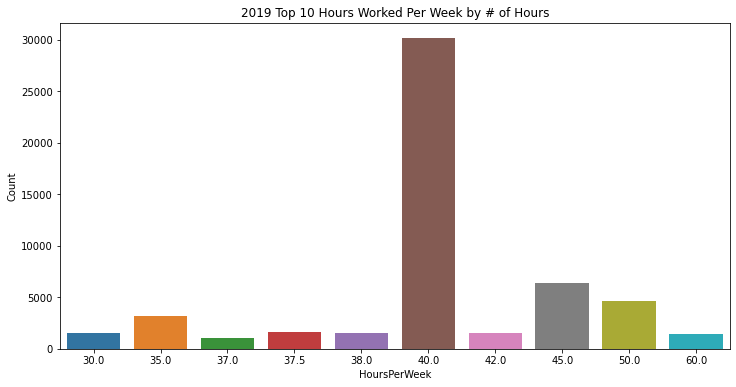

In [121]:
for i, y in zip(workweek_lst, year):
    plot_workweek(i, y)

In [101]:
print('2020 Average Hours Worked Per Week:', df_20['WorkWeekHrs'].dropna().mean())
print('2019 Average Hours Worked Per Week:', df_19['WorkWeekHrs'].dropna().mean())

2020 Average Hours Worked Per Week: 40.78217399901455
2019 Average Hours Worked Per Week: 42.12719740950033


### 4. How often do you work overtime? (New Question in the Survey)

`NEWOvertime` only exists in the 2020 survey and we can simply perform a `value_counts()`

In [122]:
df_20['NEWOvertime'].value_counts(normalize = True)

Sometimes: 1-2 days per month but less than weekly          0.267100
Often: 1-2 days per week or more                            0.255072
Occasionally: 1-2 days per quarter but less than monthly    0.219010
Rarely: 1-2 days per year or less                           0.149684
Never                                                       0.109135
Name: NEWOvertime, dtype: float64

### 5. How important is it to learn new technology in this field?

`NEWLearn` only exists in the 2020 survey so a comparison cannot be made. But, no issues with the data so we can just perform a `value_counts()`

In [123]:
df_20['NEWLearn'].value_counts(normalize = True)

Every few months        0.372854
Once a year             0.368491
Once every few years    0.236555
Once a decade           0.022099
Name: NEWLearn, dtype: float64

## Results and Conclusion

If you are looking to break into the field of programming or data science:
- Respondents are mostly located in the United States and India, but this cannot represent the whole community.
- Figuring out what programming language to learn first can be challenging. First ask yourself questions such as, “What am I learning programming for? Is it to develop a mobile application or web application? Do I want to communicate insights to stakeholders? Do I want to build machine learning models?” Once you identify what you want to achieve with programming then it is much easier to identify what to start off with.
- For data scientists, it is best to learn Python and SQL. For developers, JavaScript.
- As mentioned above, a large proportion of respondents are at least employed part-time. This can be an added benefit in order to get started in this field.
- Before jumping into this field, it is required that you prepare yourself to constantly learn new languages or technology. If you do not then after a few years you will fall behind with your skillset.
- Globally, respondents work an average of 40 hours per week. Starting in this field, expect to occasionally work overtime.

I look forward to Stack Overflow Annual Developer Survey 2021. With the pandemic, it will be interesting to see how statistics differ from 2019 and 2020.